C:\Users\giova\AppData\Local\Temp\ipykernel_20328\769076884.py:11: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("Calibration.csv").fillna(0)


10 
 [120.11961865]
15 
 [64.4490445]
20 
 [60.4778501]
25 
 [57.90812823]
30 
 [55.50153835]
35 
 [53.35894118]
40 
 [51.3276864]


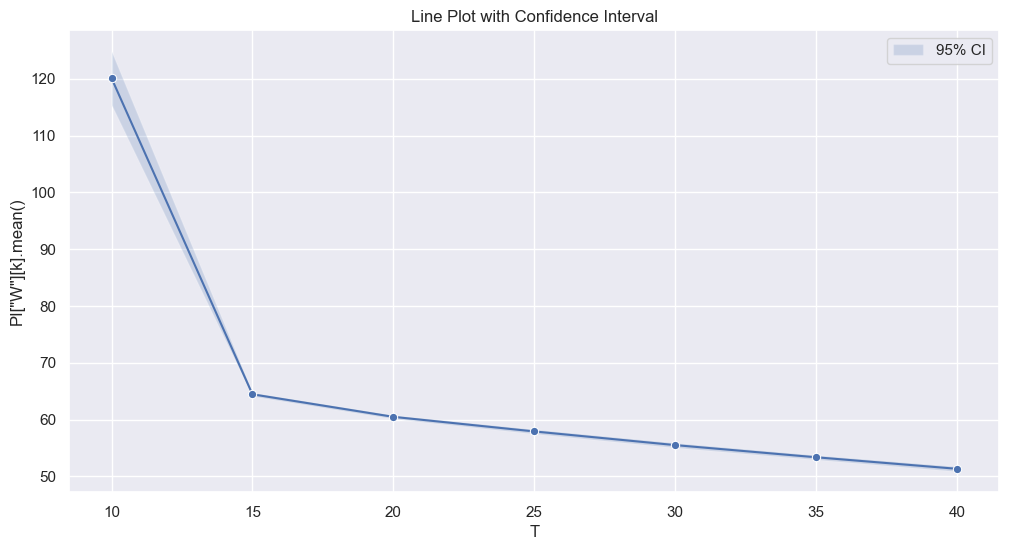

In [48]:
import pandas as pd
import numpy as np
import math


n = 50
C = 10
T = [10, 15, 20, 25, 30, 35, 40]


VTM = pd.read_csv("Calibration.csv").fillna(0)

VTM = VTM[VTM["type"] == "scalar"]
VTM = VTM[VTM["module"].str.contains("SuperMarket.globalSink")]
Exp_W = VTM[VTM["name"] == "totalQueueingTime:mean"]

CSV = {
    "W": Exp_W
}

PI = {}

for key in CSV:
    PI[key] = {}
    for k in range(len(T)):
        PI[key][k] = {}
        temp = []
        temp = [CSV[key]["value"].values[j + n*k] for j in range(n)]
        temp = list(map(float, temp))
        PI[key][k] = pd.DataFrame(temp)

i = 0
for t in T:
    print(t,"\n",PI[key][i].mean().values)
    i = i+1



import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

# Plot the line
sns.lineplot(x=x, y=y, marker='o')

# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI')


plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()




In [49]:
import pandas as pd
import numpy as np
import math


n = 50
C = 10
T = [9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7]


VTM = pd.read_csv("Calibration9.csv").fillna(0)

VTM = VTM[VTM["type"] == "scalar"]
VTM = VTM[VTM["module"].str.contains("SuperMarket.globalSink")]
Exp_W = VTM[VTM["name"] == "totalQueueingTime:mean"]

CSV = {
    "W": Exp_W
}

PI = {}

for key in CSV:
    PI[key] = {}
    for k in range(len(T)):
        PI[key][k] = {}
        temp = []
        temp = [CSV[key]["value"].values[j + n*k] for j in range(n)]
        temp = list(map(float, temp))
        PI[key][k] = pd.DataFrame(temp)

i = 0
for t in T:
    print(t,"\n",PI[key][i].mean().values)
    i = i+1

# PI_T = {}
# for key in PI:
#     PI_T[key] = pd.DataFrame()
#     PI_T[key]["Mean"] = PI[key].mean()
#     # CI 95%
#     PI_T[key]["CI (LB)"] = PI[key].mean() - (1.96 * (PI[key].std() / math.sqrt(n)))
#     PI_T[key]["CI (UB)"] = PI[key].mean() + (1.96 * (PI[key].std() / math.sqrt(n)))


# for key in PI_T:
#     print(f"    [{key}]")
#     print(PI_T[key])
#     print("\n")




C:\Users\giova\AppData\Local\Temp\ipykernel_20328\2501977960.py:11: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("Calibration9.csv").fillna(0)


9.1 
 [469.65930043]
9.2 
 [346.20509716]
9.3 
 [273.53487062]
9.4 
 [224.45314401]
9.5 
 [191.19738659]
9.6 
 [167.81197494]
9.7 
 [151.3473199]


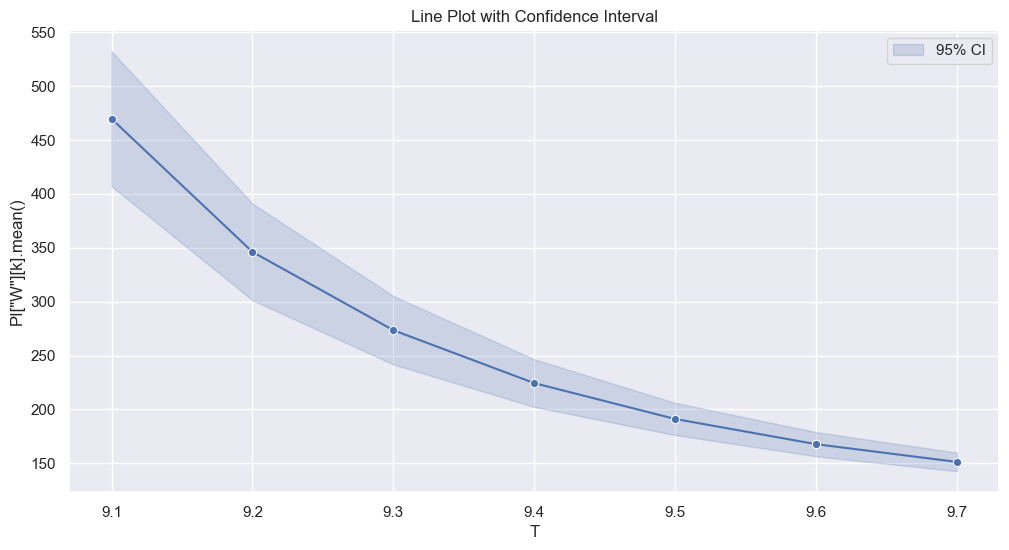

In [50]:
# With Cosini Belli
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]


# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

# Plot the line
sns.lineplot(x=x, y=y, marker='o', color='b')


# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI', color='b')

plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()



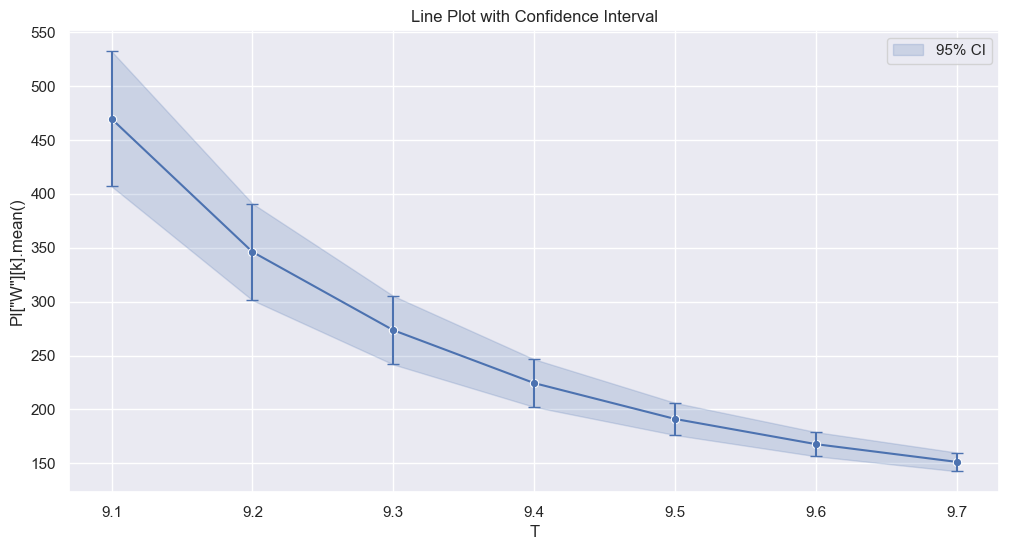

In [51]:
# With Cosini Belli
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

ci = [1.96 * (PI["W"][k].std() / math.sqrt(n)) for k in range(len(T))]
ci = [_[0] for _ in ci]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

# Plot the line
sns.lineplot(x=x, y=y, marker='o', color='b')

plt.errorbar(x=x, y=y, fmt='o', yerr=ci, markersize=3, capsize=4, color='b')


# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI', color='b')

plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()



C:\Users\giova\AppData\Local\Temp\ipykernel_20328\355094918.py:11: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("Calibration9bis.csv").fillna(0)


9.23 
 [320.73185539]
9.24 
 [312.83154047]
9.25 
 [306.79789741]
9.26 
 [298.76031526]
9.27 
 [291.60962143]
->  298.760315255702  LB: 262.11756154619184  UB: 335.4030689652121


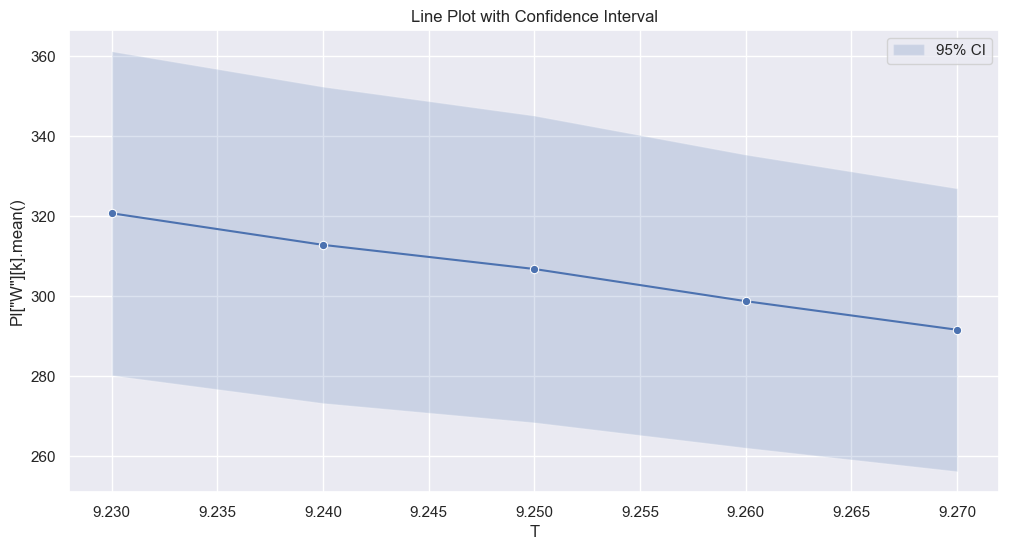

In [52]:
import pandas as pd
import numpy as np
import math


n = 50
C = 10
T = [9.23, 9.24, 9.25, 9.26, 9.27, 9.28]


VTM = pd.read_csv("Calibration9bis.csv").fillna(0)

VTM = VTM[VTM["type"] == "scalar"]
VTM = VTM[VTM["module"].str.contains("SuperMarket.globalSink")]
Exp_W = VTM[VTM["name"] == "totalQueueingTime:mean"]

CSV = {
    "W": Exp_W
}

PI = {}

for key in CSV:
    PI[key] = {}
    for k in range(len(T)):
        PI[key][k] = {}
        temp = []
        temp = [CSV[key]["value"].values[j + n*k] for j in range(n)]
        temp = list(map(float, temp))
        PI[key][k] = pd.DataFrame(temp)

i = 0
for t in T:
    print(t,"\n",PI[key][i].mean().values)
    i = i+1


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]

print("-> ",y[3], " LB:", ci_lb[3], " UB:", ci_ub[3])

# Plot the line
sns.lineplot(x=x, y=y, marker='o')

# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI')

plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()




C:\Users\giova\AppData\Local\Temp\ipykernel_20328\3706788378.py:11: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  VTM = pd.read_csv("Calibration9bis.csv").fillna(0)


9.23 
 [320.73185539]
9.24 
 [312.83154047]
9.25 
 [306.79789741]
9.26 
 [298.76031526]
9.27 
 [291.60962143]


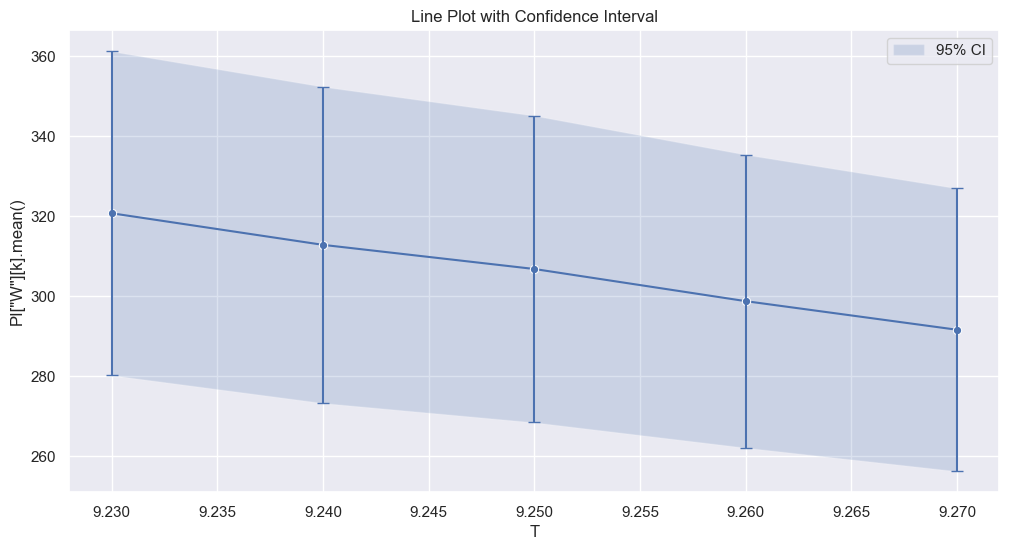

In [56]:
import pandas as pd
import numpy as np
import math


n = 50
C = 10
T = [9.23, 9.24, 9.25, 9.26, 9.27]


VTM = pd.read_csv("Calibration9bis.csv").fillna(0)

VTM = VTM[VTM["type"] == "scalar"]
VTM = VTM[VTM["module"].str.contains("SuperMarket.globalSink")]
Exp_W = VTM[VTM["name"] == "totalQueueingTime:mean"]

CSV = {
    "W": Exp_W
}

PI = {}

for key in CSV:
    PI[key] = {}
    for k in range(len(T)):
        PI[key][k] = {}
        temp = []
        temp = [CSV[key]["value"].values[j + n*k] for j in range(n)]
        temp = list(map(float, temp))
        PI[key][k] = pd.DataFrame(temp)

i = 0
for t in T:
    print(t,"\n",PI[key][i].mean().values)
    i = i+1


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Set the x-axis values as T
x = T

# Set the y-axis values as PI["W"][k].mean()
y = [PI["W"][k].mean().values for k in range(len(T))]
y = [_[0] for _ in y]

ci = [1.96 * (PI["W"][k].std() / math.sqrt(n)) for k in range(len(T))]
ci = [_[0] for _ in ci]

# Calculate the confidence interval
ci_lb = [PI["W"][k].mean().values - (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_ub = [PI["W"][k].mean().values + (1.96 * (PI["W"][k].std() / math.sqrt(n))) for k in range(len(T))]
ci_lb = [_[0] for _ in ci_lb]
ci_ub = [_[0] for _ in ci_ub]


# Plot the line
sns.lineplot(x=x, y=y, marker='o')

plt.errorbar(x=x, y=y, fmt='o', yerr=ci, markersize=3, capsize=4, color='b')

# Add the confidence interval
plt.fill_between(x, ci_lb, ci_ub, alpha=0.2, label='95% CI')


plt.title('Line Plot with Confidence Interval')
plt.xlabel('T')
plt.ylabel('PI["W"][k].mean()')

plt.legend()
plt.show()


